<font size="4">  
    ML 5642 Week 4 Assignment: Disaster Tweets
</font> 
<font size="3">  
    <ul>
        <li>Dataset is taken from <a href="https://www.kaggle.com/c/nlp-getting-started/data" target="_blank">Kaggle</a></li>
        <li>The goal of this project is to predict which tweets are about real disasters and which are not.</li>
    </ul>
</font>

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import plotly.graph_objs as go
from plotly.offline import iplot

EDA: Inspect dataframe and see if there are any adjustments we can make. Removing N/A's has trimmed our data size considerably. Our ending data set is 5 features for a total of 5,080 rows at roughly 238 kb.

In [2]:
df = pd.read_csv('train.csv')
df.info()
print("Row Count Pre-NA: ", len(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
Row Count Pre-NA:  7613


In [3]:
df.dropna(inplace = True)
df.info()
print("Row Count Post-NA: ", len(df))

<class 'pandas.core.frame.DataFrame'>
Index: 5080 entries, 31 to 7581
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5080 non-null   int64 
 1   keyword   5080 non-null   object
 2   location  5080 non-null   object
 3   text      5080 non-null   object
 4   target    5080 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 238.1+ KB
Row Count Post-NA:  5080


In [4]:
df.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [ ]:
# split words
texts = df['keyword'].str.split().explode()
# remove symbols
texts = texts.str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
# make all words lowercase so we get unique words
texts = texts.str.lower()
# remove spaces
texts = texts.str.replace(' ', '', regex=True)

# remove non descriptive and uninteresting words that are in the top 20
stopwords = [] #no stop words are apparent
cleanedText = []

for text in texts:
    if text in stopwords:
        continue
    cleanedText.append(text)

df_cleaned_text = pd.DataFrame(cleanedText, columns=['values'])
word_freq = df_cleaned_text['values'].value_counts()
data = [go.Bar(x=word_freq.index[:20], y=word_freq.values[:20])]
layout = go.Layout(title='Top 20 keyword frequencies')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

For this dataset I am choosing to try out multiple type of models to see which model produces the best accuracy and the coorelation of results between each model.

In [6]:
vectorizer = CountVectorizer(ngram_range = (1, 4))
X = vectorizer.fit_transform(df['text'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Using a Multinomial Model
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train, y_train)
multinomial_pred = multinomial_model.predict(X_test)
multinomial_acc = accuracy_score(y_test, multinomial_pred) * 100
print("Multinomial Accuracy: ", multinomial_acc)

Multinomial Accuracy:  78.24803149606299


In [8]:
# Using a Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred) * 100
print("Logistic Regression Accuracy: ", lr_acc)

Logistic Regression Accuracy:  76.27952755905511


In [9]:
# Using a KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred) * 100
print("KNN Accuracy: ", knn_acc)

KNN Accuracy:  61.12204724409449


In [10]:
# Using a SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred) * 100
print("SVM Accuracy: ", svm_acc)

SVM Accuracy:  74.9015748031496


In [11]:
# Using Decision Tree Model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred) * 100
print("Decision Tree Accuracy: ", tree_acc)

Decision Tree Accuracy:  72.83464566929135


In [12]:
# Using Random Forest Model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_acc = accuracy_score(y_test, random_forest_pred) * 100
print("Random Forest Accuracy: ", random_forest_acc)

Random Forest Accuracy:  75.39370078740157


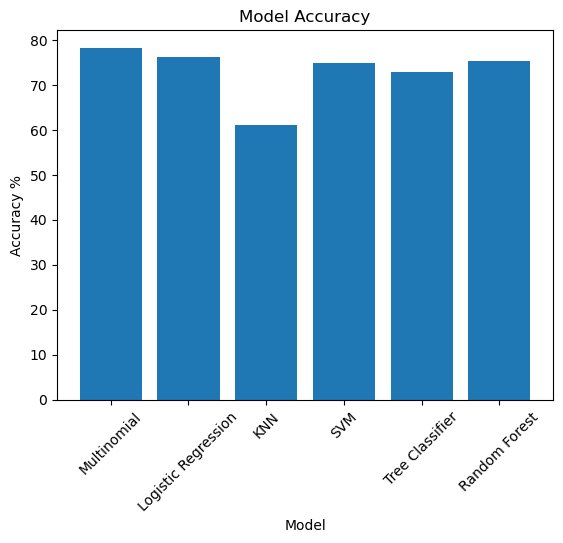

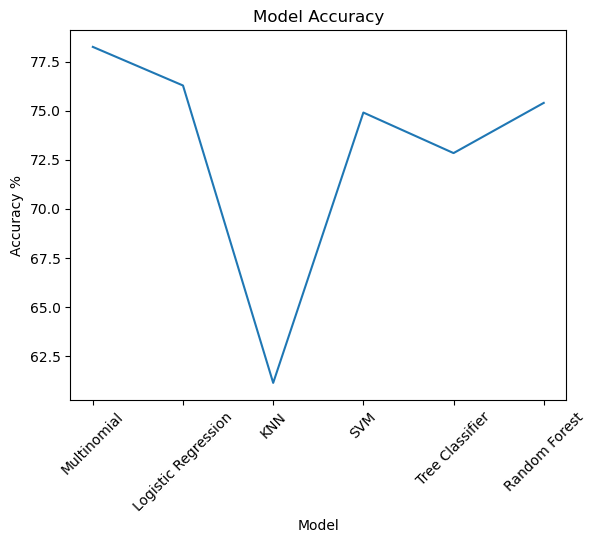

In [13]:
# Plot accuracies across the different models
x = ["Multinomial", "Logistic Regression", "KNN", "SVM", "Tree Classifier", "Random Forest"]
y = [multinomial_acc, lr_acc, knn_acc, svm_acc, tree_acc, random_forest_acc]

plt.bar(x, y)
plt.title('Model Accuracy')
plt.xticks(rotation=45, ha='center')
plt.xlabel('Model')
plt.ylabel('Accuracy %')
plt.show()

plt.plot(x, y)
plt.title('Model Accuracy')
plt.xticks(rotation=45, ha='center')
plt.xlabel('Model')
plt.ylabel('Accuracy %')
plt.show()

In [ ]:
# Cross validate against Multinomial to see if we can get a better accuracy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
 
kf = KFold(n_splits=5, random_state=None) # split data into 5 subsets
result = cross_val_score(multinomial_model, X_train, y_train, cv=kf)
print("Avg accuracy: {}".format(result.mean()))
print("Standard Deviation: {}".format(result.std()))

# We do not get a better accuracy with cross validation

Avg accuracy: 0.7598416131944571
Standard Deviation: 0.016301381223325702


Conclusion: As we can see, running various types of models have minimal accuracy fluctuation with the exception of the KNN model which had a considerable dip in accuracy. I would not use KNN for this type of data set. I suspect that KNN is not a good model to use for this data set because the data is too variable and KNN is not very good for deep learning in general. Based on our results our best model is the multinomial model which is a good model for deep learning applications. Multinomial is a good model for deep learning because it provides way to output for multiple class labels which goes hand in hand with neural networks.